<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/robot_and_walls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

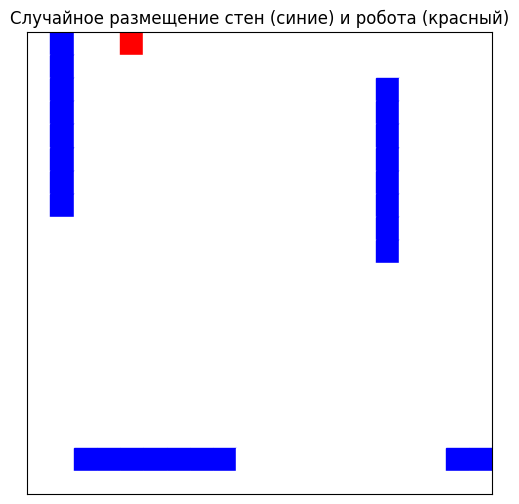

Финальный массив:
[[0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Параметры среды
grid_size = 20
num_walls = 4 # Количество стен
max_wall_length = 10  # Максимальная длина стены

# Инициализируем пустой массив
environment = np.zeros((grid_size, grid_size), dtype=int)

# Функция для размещения случайных стен
def place_walls():
    for _ in range(num_walls):
        # Случайно выбираем направление (горизонтальное или вертикальное)
        direction = random.choice(['horizontal', 'vertical'])

        # Случайная длина стены
        wall_length = random.randint(1, max_wall_length)

        # Случайные координаты начала стены
        if direction == 'horizontal':
            row = random.randint(0, grid_size - 1)
            col_start = random.randint(0, grid_size - wall_length)
            for col in range(col_start, col_start + wall_length):
                environment[row, col] = 1  # Устанавливаем стену
        else:  # vertical
            col = random.randint(0, grid_size - 1)
            row_start = random.randint(0, grid_size - wall_length)
            for row in range(row_start, row_start + wall_length):
                environment[row, col] = 1  # Устанавливаем стену

# Функция для размещения робота
def place_robot():
    while True:
        x = random.randint(0, grid_size - 1)
        y = random.randint(0, grid_size - 1)
        if environment[y, x] == 0:  # Проверяем, что клетка свободна
            environment[y, x] = 2  # Устанавливаем робота
            break

# Размещаем стены и робота
place_walls()
place_robot()

# Создаем график
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, grid_size)
ax.set_ylim(grid_size, 0)  # Инвертируем ось Y для правильного отображения

# Убираем оси
ax.set_xticks([])
ax.set_yticks([])

# Рисуем сетку с препятствиями и роботом
for i in range(grid_size):
    for j in range(grid_size):
        if environment[i, j] == 1:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color='blue'))  # Стена
        elif environment[i, j] == 2:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color='red'))   # Робот
        else:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color='white'))  # Пустое место

plt.title("Случайное размещение стен (синие) и робота (красный)")
plt.show()

# Печатаем финальный массив после закрытия графика
print("Финальный массив:")
print(environment)